#EN3150 Assignment 01
#### Muftee M. M. M.      |     220399B

## Learning from data and related challanges and linear models for regression

### 1. Linear Regression impact on outliers

In [1]:
# Step 01: Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Step 02: Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Linear Regression Data Preparation Notes

## Why use np.array() and reshape()?

### np.array() Benefits
- **Performance**: Much faster than Python lists
- **Compatibility**: Required by ML libraries (scikit-learn, TensorFlow, PyTorch)
- **Mathematical operations**: Enables vectorized operations

### reshape() for Features (X)
Machine learning algorithms need data in specific 2D format:
- **X (features)**: Must be `(n_samples, n_features)` shape
- Converts 1D list → 2D array so algorithm understands: "5 samples with 1 feature each"

```python
# Before: 1D array (ambiguous)
x = [0, 1, 2, 3, 4]  # Is this 5 samples or 1 sample with 5 features?

# After: 2D array (clear meaning)
x = np.array([0, 1, 2, 3, 4]).reshape(-1, 1)
# Shape: (5, 1) = 5 samples, 1 feature each
# [[0], [1], [2], [3], [4]]
```

### reshape() for Target (y)
**Usually NOT needed** for simple regression:

```python
# Most common case - y stays 1D
y = np.array([0, 2, 4, 6, 8])  # Shape: (5,) - works fine
```

**When you DO need to reshape y:**
- Multi-target regression: `y.reshape(-1, 2)` for predicting 2 targets
- Some libraries require 2D: `y.reshape(-1, 1)`
- Neural networks often expect 2D targets

### Complete Example
```python
import numpy as np

# Basic setup
x = np.array([0, 1, 2, 3, 4]).reshape(-1, 1)  # Shape: (5, 1)
y = np.array([0, 2, 4, 6, 8])                 # Shape: (5,)

# Alternative (both 2D for consistency)
x = np.array([0, 1, 2, 3, 4]).reshape(-1, 1)  # Shape: (5, 1)
y = np.array([0, 2, 4, 6, 8]).reshape(-1, 1)  # Shape: (5, 1)
```

### Key Point
- **X**: MUST be 2D (data table format)
- **y**: CAN be 1D for single targets, but 2D is safer for compatibility

### The -1 Trick
`reshape(-1, 1)` means: "Make 1 column, figure out rows automatically"

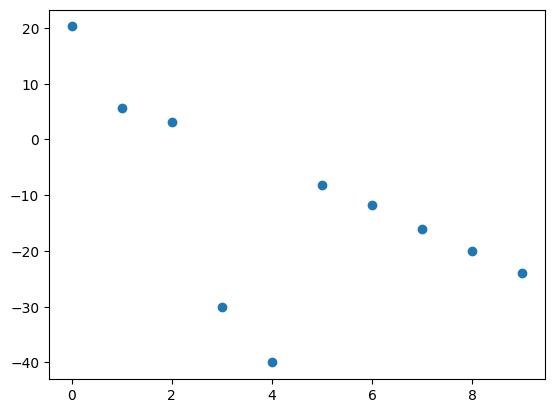

In [3]:
# Step 03: Visualize the data
plt.scatter(x_i, y_i)
plt.show()

In [4]:
# Step 04: Train a Linear Regression Model
model = LinearRegression()
model.fit(x_i, y_i)
y_pred = model.predict(x_i)

In [5]:
# Step 05: Print the regression line equation
print(f"Regression Line: y = {model.coef_[0]: .2f}x + {model.intercept_:.2f}")

Regression Line: y = -3.56x + 3.92


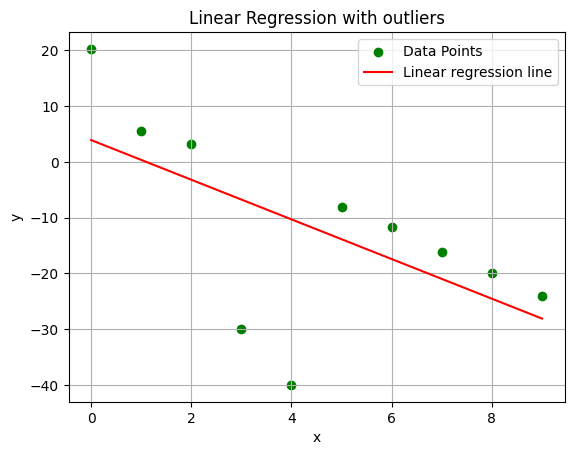

In [6]:
#Step 06: Plot the data and regression line
plt.scatter(x_i, y_i, color= 'green', label = 'Data Points')
plt.plot(x_i, y_pred, color = 'red', label = 'Linear regression line')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression with outliers')
plt.legend()
plt.grid('True')
plt.show()

### Introducing a Robust Estimator

In [7]:
# Define the Data
x_i = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).reshape(-1, 1)
y_i = np.array([20.26, 5.61, 3.14, -30.00, -40.00, -8.13, -11.73, -16.08, -19.95, -24.03])

# Define Models
def model1(x): return -4 * x + 12
def model2(x): return -3.55 * x + 3.91

# Predictions for each model
y_pred1 = model1(x_i)
y_pred2 = model2(x_i)

# Define the Robust Loss Function
def robust_loss(y_i, y_pred, beta):
  residual_squared = (y_i - y_pred) ** 2
  loss = residual_squared / (residual_squared + beta ** 2)
  return np.mean(loss)

# Define Beta values
betas = [1, 1e-6, 1e3]

# Calculate and print loss
print("Beta\t\t Loss(Model 01)\t\t Loss(Model 02)")
for beta in betas:
  loss1 = robust_loss(y_i, y_pred1, beta)
  loss2 = robust_loss(y_i, y_pred2, beta)
  print(f"{beta:.0e}\t\t{loss1:.6f}\t\t{loss2:.6f}")

Beta		 Loss(Model 01)		 Loss(Model 02)
1e+00		0.929811		0.949055
1e-06		1.000000		1.000000
1e+03		0.000461		0.000396
